In [57]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv("DataSets/dataset.csv")
data.sample(5)

,Flower Name,Number of Flowers,Number of Leaves,Area of Roots (pixels),Number of Stems,Date,Time,Location,Shop Name,Age Gap week
378,Dendrobium,9,6,1230,3,8/23/2024,11:40 AM,nittambuwa,Sonia Orchid Center,child
161,Phalaenopsis,10,14,1630,1,10/4/2024,2:40 PM,nittambuwa,Sonia Orchid Center,adult
90,Phalaenopsis,3,6,1680,4,8/27/2024,11:01 AM,kurunegala,Kenuja Orchid,adult
156,Phalaenopsis,3,15,1540,5,10/9/2024,12:45 PM,kurunegala,Kenuja Orchid,mature
482,Phalaenopsis,5,2,1250,3,8/13/2024,3:29 PM,gampaha,Bloom Orchids,child


In [58]:
data['Flower Name'].value_counts()

Flower Name
Phalaenopsis    170
Dendrobium      170
Vanda           160
Name: count, dtype: int64

In [59]:
# Create a mapping for flower name to numbers
category_mapping = {
    "Dendrobium": 1,
    "Phalaenopsis": 2,
    "Vanda": 3,
}

# Apply the mapping to convert flower name to numbers
data["Flower Name Numeric"] = data["Flower Name"].map(category_mapping)

# Display the first few rows to confirm the conversion
data.head()

,Flower Name,Number of Flowers,Number of Leaves,Area of Roots (pixels),Number of Stems,Date,Time,Location,Shop Name,Age Gap week,Flower Name Numeric
0,Phalaenopsis,5,1,1770,2,8/23/2024,1:08 PM,kadawatha,T&Y Flower Creations,adult,2
1,Phalaenopsis,8,4,1620,5,10/16/2024,12:32 PM,kurunegala,Kenuja Orchid,mature,2
2,Phalaenopsis,10,9,1350,2,9/27/2024,2:05 PM,rabukkana,Kalani Flora Orchid,young,2
3,Dendrobium,9,5,1780,1,10/14/2024,11:18 AM,gampaha,Bloom Orchids,adult,1
4,Dendrobium,2,11,1430,4,8/17/2024,11:05 AM,kurunegala,Kenuja Orchid,young,1


In [60]:
data['Age Gap week'].value_counts()

Age Gap week
adult     321
young      57
child      52
mature     46
baby       24
Name: count, dtype: int64

In [61]:
# Create a mapping for categories to numbers
category_mapping = {
    "baby": 1,
    "child": 2,
    "young": 3,
    "mature": 4,
    "adult": 5
}

# Apply the mapping to convert categories to numbers
data["Age Gap Numeric"] = data["Age Gap week"].map(category_mapping)

# Display the first few rows to confirm the conversion
data.head()


,Flower Name,Number of Flowers,Number of Leaves,Area of Roots (pixels),Number of Stems,Date,Time,Location,Shop Name,Age Gap week,Flower Name Numeric,Age Gap Numeric
0,Phalaenopsis,5,1,1770,2,8/23/2024,1:08 PM,kadawatha,T&Y Flower Creations,adult,2,5
1,Phalaenopsis,8,4,1620,5,10/16/2024,12:32 PM,kurunegala,Kenuja Orchid,mature,2,4
2,Phalaenopsis,10,9,1350,2,9/27/2024,2:05 PM,rabukkana,Kalani Flora Orchid,young,2,3
3,Dendrobium,9,5,1780,1,10/14/2024,11:18 AM,gampaha,Bloom Orchids,adult,1,5
4,Dendrobium,2,11,1430,4,8/17/2024,11:05 AM,kurunegala,Kenuja Orchid,young,1,3


In [62]:
data = data.drop(columns=['Flower Name'])
data = data.drop(columns=['Date'])
data = data.drop(columns=['Time'])
data = data.drop(columns=['Location'])
data = data.drop(columns=['Shop Name'])
data = data.drop(columns=['Age Gap week'])

In [63]:
data.head()

,Number of Flowers,Number of Leaves,Area of Roots (pixels),Number of Stems,Flower Name Numeric,Age Gap Numeric
0,5,1,1770,2,2,5
1,8,4,1620,5,2,4
2,10,9,1350,2,2,3
3,9,5,1780,1,1,5
4,2,11,1430,4,1,3


                        Number of Flowers  Number of Leaves  \
Number of Flowers                1.000000         -0.005589   
Number of Leaves                -0.005589          1.000000   
Area of Roots (pixels)           0.032576          0.065687   
Number of Stems                  0.025863          0.002038   
Flower Name Numeric              0.050834          0.008997   
Age Gap Numeric                  0.120400          0.009425   

                        Area of Roots (pixels)  Number of Stems  \
Number of Flowers                     0.032576         0.025863   
Number of Leaves                      0.065687         0.002038   
Area of Roots (pixels)                1.000000        -0.027940   
Number of Stems                      -0.027940         1.000000   
Flower Name Numeric                  -0.049897        -0.011640   
Age Gap Numeric                       0.548771        -0.046621   

                        Flower Name Numeric  Age Gap Numeric  
Number of Flowers        

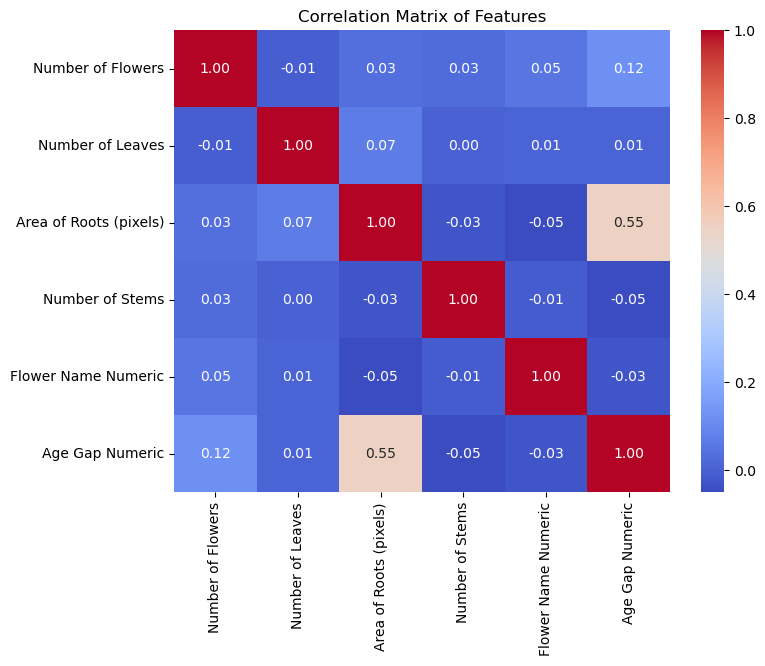

In [64]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Display correlation matrix
print(correlation_matrix)

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()


                        Number of Flowers  Number of Leaves  \
Number of Flowers                1.000000         -0.005589   
Number of Leaves                -0.005589          1.000000   
Area of Roots (pixels)           0.032576          0.065687   
Number of Stems                  0.025863          0.002038   
Flower Name Numeric              0.050834          0.008997   
Age Gap Numeric                  0.120400          0.009425   

                        Area of Roots (pixels)  Number of Stems  \
Number of Flowers                     0.032576         0.025863   
Number of Leaves                      0.065687         0.002038   
Area of Roots (pixels)                1.000000        -0.027940   
Number of Stems                      -0.027940         1.000000   
Flower Name Numeric                  -0.049897        -0.011640   
Age Gap Numeric                       0.548771        -0.046621   

                        Flower Name Numeric  Age Gap Numeric  
Number of Flowers        

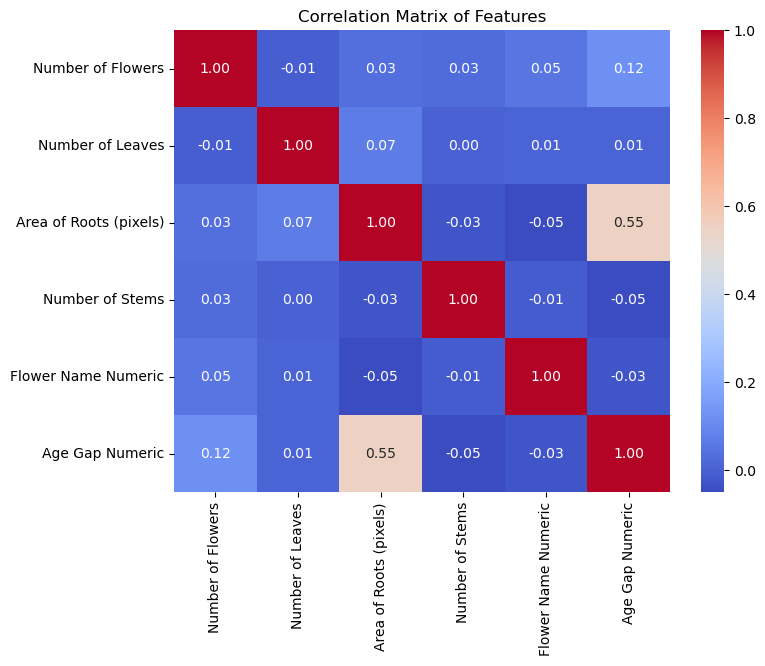

In [65]:
# Display correlation matrix
print(correlation_matrix)

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()

In [66]:
# Check for null values in the dataset
print("Null values before removal:\n", data.isnull().sum())

# Remove rows with null values
data_cleaned = data.dropna()

# Verify that null values are removed
print("\nNull values after removal:\n", data_cleaned.isnull().sum())

# Display the cleaned dataset
print("\nCleaned dataset:")
print(data_cleaned.head())


Null values before removal:
 Number of Flowers         0
Number of Leaves          0
Area of Roots (pixels)    0
Number of Stems           0
Flower Name Numeric       0
Age Gap Numeric           0
dtype: int64

Null values after removal:
 Number of Flowers         0
Number of Leaves          0
Area of Roots (pixels)    0
Number of Stems           0
Flower Name Numeric       0
Age Gap Numeric           0
dtype: int64

Cleaned dataset:
   Number of Flowers  Number of Leaves  Area of Roots (pixels)  \
0                  5                 1                    1770   
1                  8                 4                    1620   
2                 10                 9                    1350   
3                  9                 5                    1780   
4                  2                11                    1430   

   Number of Stems  Flower Name Numeric  Age Gap Numeric  
0                2                    2                5  
1                5                    2        

In [67]:
# Select features (X) and target (y)
X = data[['Number of Flowers', 'Number of Leaves', 'Area of Roots (pixels)', 'Number of Stems']] 
y = data['Age Gap Numeric']

In [68]:
X.shape

(500, 4)

In [69]:
y.shape

(500,)

In [70]:

print(X.isnull().sum())
print(y.isnull().sum())


Number of Flowers         0
Number of Leaves          0
Area of Roots (pixels)    0
Number of Stems           0
dtype: int64
0


In [71]:
y.value_counts()

Age Gap Numeric
5    321
3     57
2     52
4     46
1     24
Name: count, dtype: int64

In [72]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_resampled).value_counts())


Age Gap Numeric
5    321
4    321
3    321
2    321
1    321
Name: count, dtype: int64


In [73]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)


In [74]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize a list to store model results
results = []

def model_executor_and_accuracy(model, model_name):
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Save the model results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Confusion Matrix": cm
    })

    print(f"<<<<====== {model_name} ====>>>>")
    print(f"Accuracy: {accuracy:.4f}")
    
    # Plot the confusion matrix
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["baby", "child", "young", "mature", "adult"])
    cm_display.plot(cmap='viridis', values_format='d')
    plt.show()



<<<<====== Logistic Regression ====>>>>
Accuracy: 0.2710


c:\Users\malit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


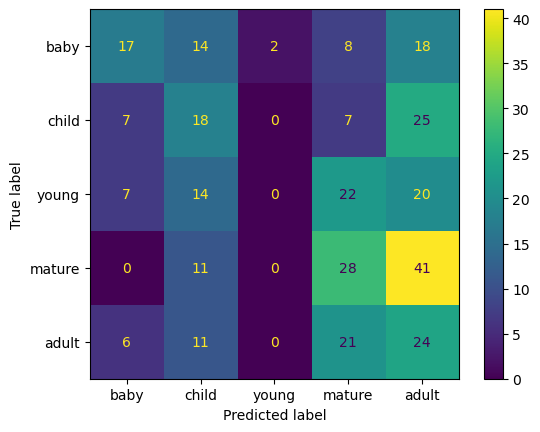

<<<<====== Decision Tree ====>>>>
Accuracy: 0.9595


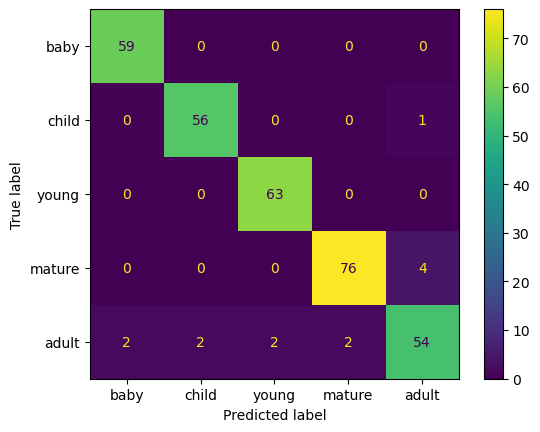

<<<<====== KNN ====>>>>
Accuracy: 0.9564


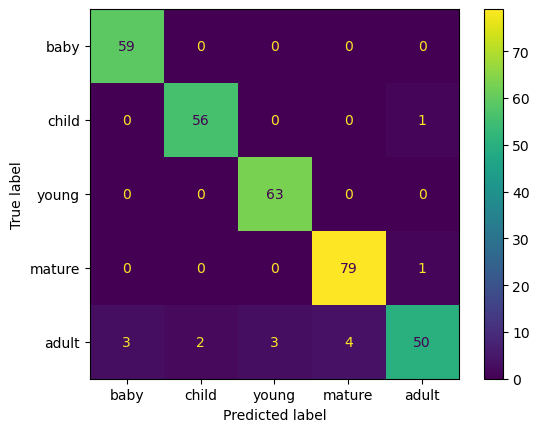

In [75]:
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("KNN", KNeighborsClassifier())
]

# Calling the method for each model
for model_name, model in models:
    model_executor_and_accuracy(model, model_name)

In [76]:
# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Display the model with the best accuracy
best_model = results_df.loc[results_df["Accuracy"].idxmax()]
print("\nBest Model:")
print(best_model)

# Display the entire results dataframe
print("\nAll Model Results:")
print(results_df)


Best Model:
Model                                                   Decision Tree
Accuracy                                                     0.959502
Confusion Matrix    [[59, 0, 0, 0, 0], [0, 56, 0, 0, 1], [0, 0, 63...
Name: 1, dtype: object

All Model Results:
                 Model  Accuracy  \
0  Logistic Regression  0.271028   
1        Decision Tree  0.959502   
2                  KNN  0.956386   

                                    Confusion Matrix  
0  [[17, 14, 2, 8, 18], [7, 18, 0, 7, 25], [7, 14...  
1  [[59, 0, 0, 0, 0], [0, 56, 0, 0, 1], [0, 0, 63...  
2  [[59, 0, 0, 0, 0], [0, 56, 0, 0, 1], [0, 0, 63...  


Best Model: DecisionTreeClassifier()
Accuracy on test data: 0.9626


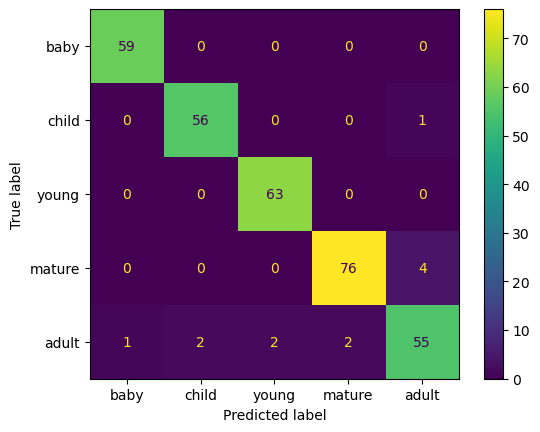

In [ ]:
best_model = DecisionTreeClassifier()
# Train the best model with the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model: {best_model}")
print(f"Accuracy on test data: {accuracy:.4f}")

# Optionally, display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["baby", "child", "young", "mature", "adult"])
cm_display.plot(cmap='viridis', values_format='d')
plt.show()


In [78]:
# Manually specifying a sample
sample = [10, 7, 1630, 2]

sample = [sample] 

# Use the trained best model to make a prediction
sample_prediction = best_model.predict(sample)

# Display the prediction
print(f"Predicted Value: {sample_prediction[0]}")

if sample_prediction[0] == 1:
    print("Baby plant weeks 6 - 12")
elif sample_prediction[0] == 2:
    print("Child plant weeks 13 - 24")
elif sample_prediction[0] == 3:
    print("Young plant weeks 25 - 36")  
elif sample_prediction[0] == 4:
    print("Mature plant weeks 37 - 52")
elif sample_prediction[0] == 5:
    print("Adult plant more than 52 weeks")

Predicted Value: 5
Adult plant more than 52 weeks


c:\Users\malit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [79]:
import joblib

# Save the trained model to a file
joblib.dump(best_model, "orchid_growth_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [81]:
# Define a sample for prediction
sample = [[10, 7, 1630, 2]]  # Keep it as a nested list

# Use the loaded model to make a prediction
sample_prediction = best_model.predict(sample)

# Display the prediction
print(f"Predicted Value: {sample_prediction[0]}")

if sample_prediction[0] == 1:
    print("Baby plant weeks 6 - 12")
elif sample_prediction[0] == 2:
    print("Child plant weeks 13 - 24")
elif sample_prediction[0] == 3:
    print("Young plant weeks 25 - 36")  
elif sample_prediction[0] == 4:
    print("Mature plant weeks 37 - 52")
elif sample_prediction[0] == 5:
    print("Adult plant more than 52 weeks")

Predicted Value: 5
Adult plant more than 52 weeks


c:\Users\malit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
